![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from ast import literal_eval

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
27655,id_8110,London,NaN,8119.0,NaN,5.0,"[['The Spicer Review', 'Fresh and Flavoursome'...",/Restaurant_Review-g186338-d5243358-Reviews-Za...,d5243358,1,5.0
33700,id_5690,Barcelona,NaN,5691.0,NaN,NaN,"[['Yummy Candies'], ['08/03/2016']]",/Restaurant_Review-g187497-d5609053-Reviews-Mi...,d5609053,1,4.0
4825,id_4825,Madrid,"['Mediterranean', 'Spanish']",5274.0,$$ - $$$,67.0,"[['Good paella', 'Elegant restaurant'], ['06/2...",/Restaurant_Review-g187514-d990749-Reviews-Rot...,d990749,0,0.0
23047,id_852,Rome,"['Japanese', 'Seafood', 'Sushi', 'Asian', 'Sou...",853.0,$$ - $$$,845.0,"[['Late Delicious Dinner', 'Best Japanese rest...",/Restaurant_Review-g187791-d790501-Reviews-Zen...,d790501,1,4.0
791,id_791,Bratislava,NaN,353.0,NaN,2.0,"[['Cool name for the bar'], ['01/01/2015']]",/Restaurant_Review-g274924-d4769839-Reviews-Co...,d4769839,0,0.0


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [15]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [16]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [17]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [18]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [19]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [20]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
37661,id_5121,['Spanish'],5122.0,$,19.0,"[['Unexpectedly good', 'Fantastic ! !'], ['05/...",/Restaurant_Review-g187497-d8065357-Reviews-L_...,d8065357,1,5.0,...,0,0,0,0,0,0,0,0,0,0
20556,id_1120,['Vegetarian Friendly'],1121.0,$$ - $$$,366.0,"[['Great hamburger, too bad for the beer', 'Gr...",/Restaurant_Review-g187791-d6155758-Reviews-Ta...,d6155758,1,4.0,...,0,0,0,0,1,0,0,0,0,0
8987,id_8987,"['Italian', 'Mediterranean', 'European']",731.0,$$ - $$$,34.0,"[['Pizza al forno di pietra! The authentic!', ...",/Restaurant_Review-g188113-d3521801-Reviews-Re...,d3521801,0,0.0,...,0,0,0,0,0,0,0,0,1,0
19306,id_91,"['Italian', 'Seafood', 'Mediterranean', 'Veget...",92.0,$$ - $$$,317.0,"[['Lovely restaurant, overpriced supplements',...",/Restaurant_Review-g187849-d8768919-Reviews-Gl...,d8768919,1,4.5,...,0,0,0,0,0,0,0,0,0,0
4434,id_4434,['Indian'],1651.0,NaN,7.0,"[['Worst ever ""indian"" experience', 'Really go...",/Restaurant_Review-g189541-d3589001-Reviews-Ta...,d3589001,0,0.0,...,0,0,0,0,0,0,0,0,0,0


# Price Range

Возьмем следующий признак "Price Range".

In [22]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [23]:
data['Price Range'].unique()

array(['$$ - $$$', '$$$$', '$', nan], dtype=object)

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [24]:
# Ваша обработка 'Price Range'

Расставляем Price Range по возрастанию, заодно меняя пропуски на самое часто встречающееся значение.

In [25]:
price_categories = {
    '$': 1,
    '$$ - $$$': 2,
    '$$$$': 3
}

def map_price(x):
    if pd.isna(x):
        return 2
    else:
        return price_categories[x]

data['Price Range'] = data['Price Range'].apply(map_price)

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [26]:
data.sample(1)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
44620,id_877,NaN,878.0,2,0.0,"[['My most unpleasant dining,unfortunately I.....",/Restaurant_Review-g274924-d4770266-Reviews-Ed...,d4770266,1,1.0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# тут ваш код на обработку других признаков
# .....

# Cuisine Style

In [28]:
#data['Cuisine Style'].fillna('[]', inplace=True)
#data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: literal_eval(x))

test = data.copy()

def map_price(x):
    if pd.isna(x):
        return 1
    else:
        return len(literal_eval(x))
    
test['Cuisine Styles Number'] = test['Cuisine Style'].apply(map_price)
test

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,Cuisine Styles Number
0,id_0,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,1,0,0,0,0,0,0,0,2
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,5
2,id_2,['Vegetarian Friendly'],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,5
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,2,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,...,0,0,0,0,0,0,0,0,0,4
49996,id_6340,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,2,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,...,0,1,0,0,0,0,0,0,0,5
49997,id_1649,"['Japanese', 'Sushi']",1652.0,2,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,...,0,0,0,0,1,0,0,0,0,2
49998,id_640,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,2,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,...,0,0,0,0,0,0,1,0,0,5


In [29]:
len(data[data['Reviews'] == '[[], []]'])

8112

In [30]:
test = data.copy()

test['Reviews'].fillna('[[], []]', inplace=True)

def map_to_list(x):
    return literal_eval(x.replace('nan', 'None'))
test['Reviews'] = test['Reviews'].apply(map_to_list)


def map_reviews_interval(x):
    if len(x[1]) < 2:
        return 0
    else:
        return abs((pd.to_datetime(x[1][1]) - pd.to_datetime(x[1][0])).days)
    
def map_reviews_latest(x):
    if len(x[1]) < 1:
        return 0
    else:
        return max(list(map(lambda y: pd.to_datetime(y).timestamp(), x[1])))

test['Reviews_intreval'] = test['Reviews'].apply(map_reviews_interval)
test['Reviews_latest'] = test['Reviews'].apply(map_reviews_latest)
test

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,Reviews_intreval,Reviews_latest
0,id_0,"['Bar', 'Pub']",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,1,0,0,0,0,0,0,0,0,0.000000e+00
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[[Very good reviews!, Fine dining in Hakaniemi...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,37,1.512432e+09
2,id_2,['Vegetarian Friendly'],810.0,2,28.0,"[[Better than the Links, Ivy Black], [12/28/20...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,22,1.514419e+09
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[[Most exquisite, Delicious and authentic], [1...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,14,1.512518e+09
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[[Always the best in bratislava, Very good but...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,15,1.518048e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,2,79.0,"[[The real Italian experience!, Wonderful food...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,...,0,0,0,0,0,0,0,0,34,1.513382e+09
49996,id_6340,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,2,542.0,"[[Parisian atmosphere, Bit pricey but interest...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,...,1,0,0,0,0,0,0,0,9,1.513814e+09
49997,id_1649,"['Japanese', 'Sushi']",1652.0,2,4.0,"[[Good by swedish standards, A hidden jewel in...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,...,0,0,0,1,0,0,0,0,3127,1.478131e+09
49998,id_640,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,2,70.0,"[[Underground restaurant, Oldest Restaurant in...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,...,0,0,0,0,0,1,0,0,23,1.499731e+09


In [31]:
def round_of_rating(number):
    result = round(number * 2) / 2
    if (result > 5): result = 5
    return result

round_of_rating(6)

5

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

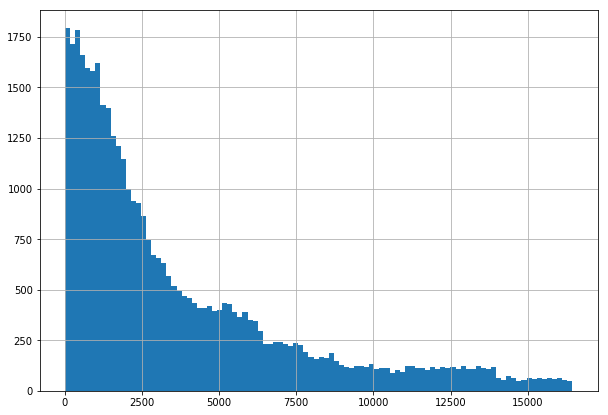

In [32]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

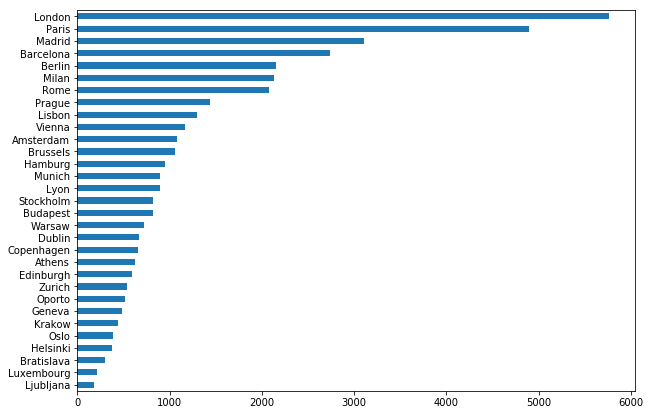

In [33]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

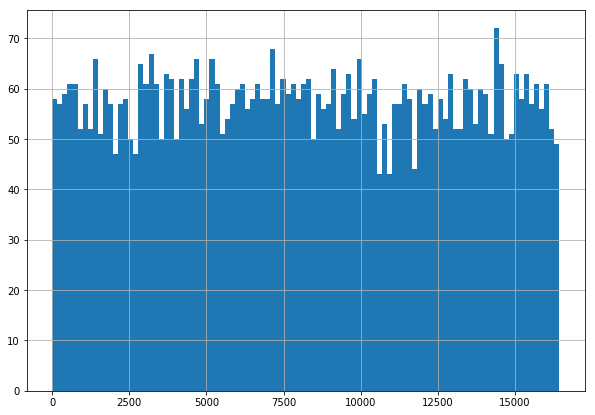

In [34]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

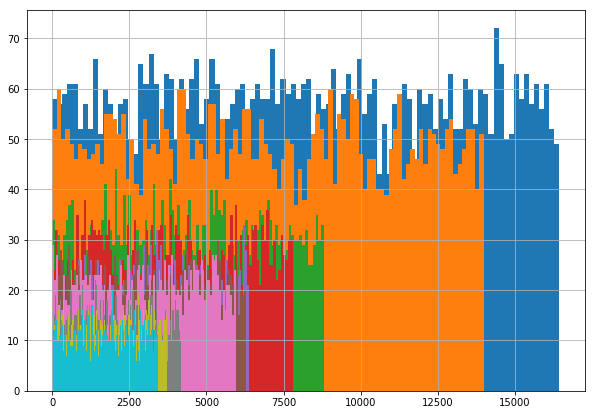

In [35]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

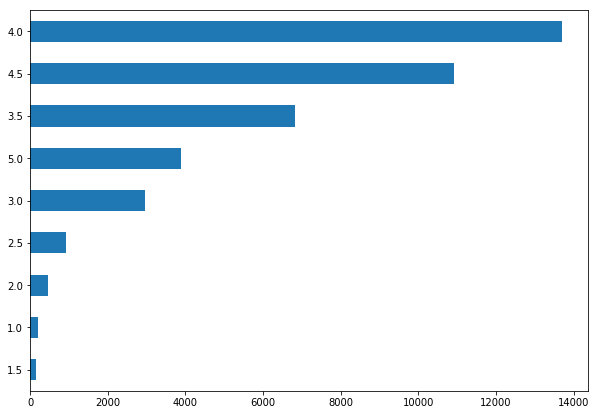

In [36]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

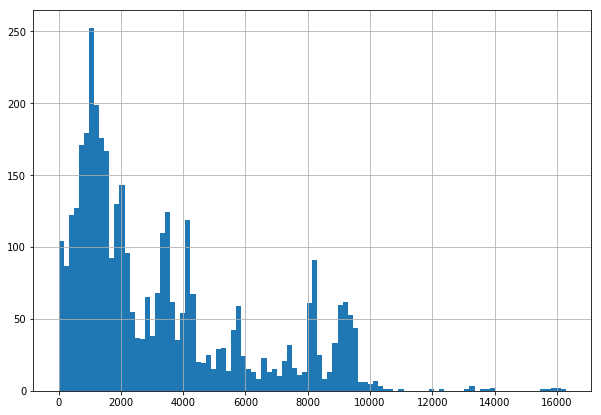

In [37]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

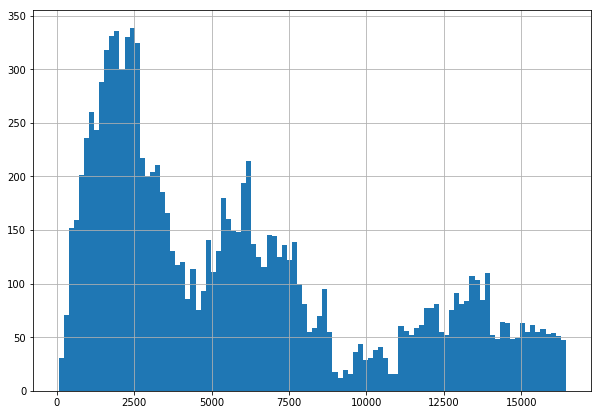

In [38]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

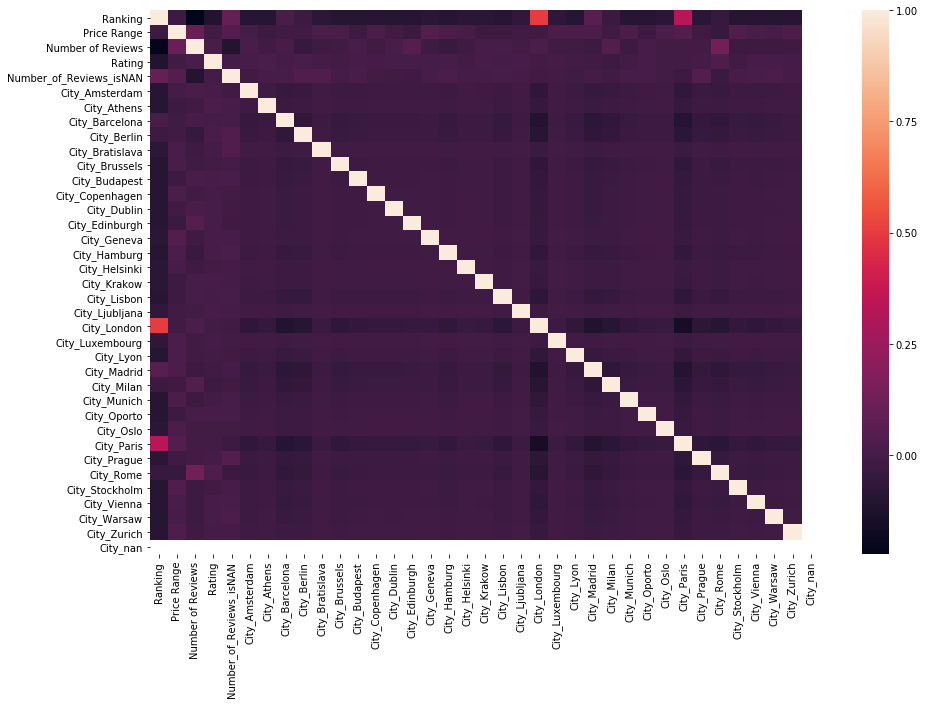

In [39]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [40]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [41]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA','URL_TA'], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...    
    df_output['Number of Reviews_isNAN'] = pd.isna(df_output['Number of Reviews']).astype('uint8')
    df_output['Cuisine Styles_isNAN'] = pd.isna(df_output['Cuisine Style']).astype('uint8')
    df_output['Price Range_isNAN'] = pd.isna(df_output['Price Range']).astype('uint8')
    
    df_output['Number of Reviews'].fillna(0, inplace=True)
    df_output['Reviews'].fillna('[[], []]', inplace=True)
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output['City_draft'] = df_output['City']
    df_output = pd.get_dummies(df_output, columns=['City_draft'], dummy_na=True)    
    
    price_categories = {
        '$': 1,
        '$$ - $$$': 2,
        '$$$$': 3
    }

    def map_price(x):
        if pd.isna(x):
            return 2
        else:
            return price_categories[x]

    df_output['Price Range'] = df_output['Price Range'].apply(map_price)
        
    # ################### 4. Feature Engineering ####################################################    
    ranking_mean = df_output.groupby(['City'])['Ranking'].mean()
    restaurants_counts = df_output['City'].value_counts()
    def normalize_ranking(x):
        return (x['Ranking'] - ranking_mean[x['City']]) / restaurants_counts[x['City']]
    
    df_output['Ranking_normalized'] = df_output.apply(normalize_ranking, axis=1)
    df_output.drop(['Ranking'], axis = 1, inplace = True)
    
    def map_cuisines(x):
        if pd.isna(x):
            return 1
        else:
            return len(literal_eval(x))
    
    df_output['Cuisine Styles Number'] = df_output['Cuisine Style'].apply(map_cuisines)
    
    # Предположим, что длина отзыва как-то связана с оценкой ресторана
    df_output['Reviews_length'] = df_output['Reviews'].apply(lambda x: len(x))

    def map_to_list(x):
        return literal_eval(x.replace('nan', 'None'))
    df_output['Reviews'] = df_output['Reviews'].apply(map_to_list)

    def map_reviews_interval(x):
        if len(x[1]) < 2:
            return 0
        else:
            return abs((pd.to_datetime(x[1][1]) - pd.to_datetime(x[1][0])).days)

    def map_reviews_latest(x):
        if len(x[1]) < 1:
            return 0
        else:
            return max(list(map(lambda y: pd.to_datetime(y).timestamp(), x[1])))

    df_output['Reviews_intreval'] = df_output['Reviews'].apply(map_reviews_interval)
    df_output['Reviews_latest'] = df_output['Reviews'].apply(map_reviews_latest)
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

In [42]:
def round_of_rating(number):
    result = round(number * 2) / 2
    if (result > 5): result = 5
    return result

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [43]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Price Range,Number of Reviews,sample,Rating,Number of Reviews_isNAN,Cuisine Styles_isNAN,Price Range_isNAN,City_draft_Amsterdam,City_draft_Athens,City_draft_Barcelona,...,City_draft_Stockholm,City_draft_Vienna,City_draft_Warsaw,City_draft_Zurich,City_draft_nan,Ranking_normalized,Cuisine Styles Number,Reviews_length,Reviews_intreval,Reviews_latest
48589,2,86.0,1,3.5,0,0,0,0,0,0,...,0,0,0,0,0,0.816355,5,101,4,1.447805e+09
28178,2,120.0,1,3.0,0,0,0,0,0,0,...,0,0,0,0,0,1.030056,3,98,24,1.498349e+09
14009,2,0.0,1,5.0,1,1,1,0,0,0,...,0,0,1,0,0,-0.025074,1,8,0,0.000000e+00
46733,2,355.0,1,4.0,0,0,0,0,0,0,...,0,0,0,0,0,-0.554537,6,69,32,1.509926e+09
26425,2,24.0,1,4.0,0,0,0,0,0,1,...,0,0,0,0,0,0.833749,2,69,1766,1.504224e+09
49447,3,432.0,1,4.0,0,0,0,0,0,0,...,0,0,0,0,0,-1.014990,5,79,9,1.514765e+09
17370,2,79.0,1,4.5,0,0,0,0,0,0,...,0,0,0,0,0,-0.625809,2,81,49,1.502928e+09
3226,2,6.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0.553534,2,93,403,1.515715e+09
5695,2,0.0,0,0.0,1,1,1,0,0,0,...,0,0,0,0,0,0.149770,1,43,0,1.471997e+09
24618,1,8.0,1,3.5,0,0,0,0,0,1,...,0,0,0,0,0,0.925060,2,125,281,1.513901e+09


In [44]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 44 columns):
Price Range                50000 non-null int64
Number of Reviews          50000 non-null float64
sample                     50000 non-null int64
Rating                     50000 non-null float64
Number of Reviews_isNAN    50000 non-null uint8
Cuisine Styles_isNAN       50000 non-null uint8
Price Range_isNAN          50000 non-null uint8
City_draft_Amsterdam       50000 non-null uint8
City_draft_Athens          50000 non-null uint8
City_draft_Barcelona       50000 non-null uint8
City_draft_Berlin          50000 non-null uint8
City_draft_Bratislava      50000 non-null uint8
City_draft_Brussels        50000 non-null uint8
City_draft_Budapest        50000 non-null uint8
City_draft_Copenhagen      50000 non-null uint8
City_draft_Dublin          50000 non-null uint8
City_draft_Edinburgh       50000 non-null uint8
City_draft_Geneva          50000 non-null uint8
City_draft_Hamburg     

In [45]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [46]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [47]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 43), (40000, 43), (40000, 42), (32000, 42), (8000, 42))

# Model 
Сам ML

In [48]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [49]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [50]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


Initial: 0.21240125

+Price Range: 0.21188875000000001

+Cusines number: 0.211301875

+Cusines isNan: 0.21073

+Review length: 0.210320625

+Price Range isNan: 0.21011312499999996

+Reviews interval: 0.212436875

+Reviews latest: 0.20737

+Normalize ranking: 0.205254375


In [51]:
y_pred = np.array([round_of_rating(x) for x in y_pred])
y_pred

array([4.5, 5. , 4.5, ..., 4.5, 4. , 4. ])

In [52]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.1729375


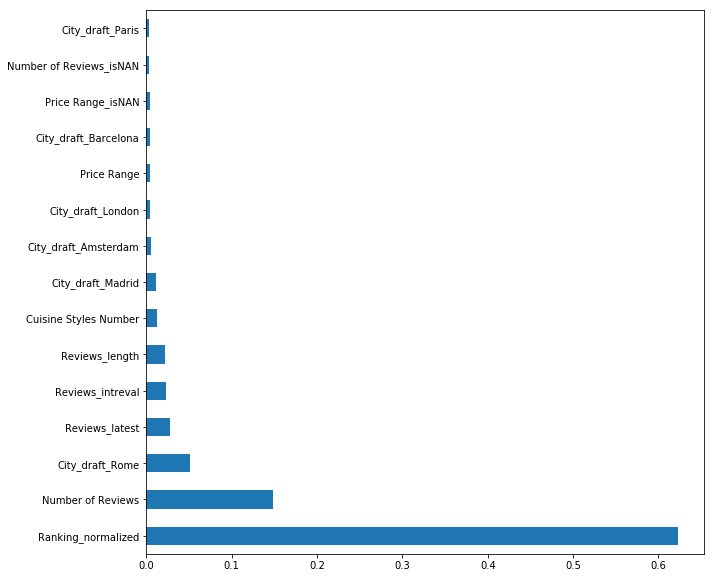

In [53]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [54]:
test_data.sample(10)

,Price Range,Number of Reviews,Rating,Number of Reviews_isNAN,Cuisine Styles_isNAN,Price Range_isNAN,City_draft_Amsterdam,City_draft_Athens,City_draft_Barcelona,City_draft_Berlin,...,City_draft_Stockholm,City_draft_Vienna,City_draft_Warsaw,City_draft_Zurich,City_draft_nan,Ranking_normalized,Cuisine Styles Number,Reviews_length,Reviews_intreval,Reviews_latest
2876,2,12.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.714263,3,8,0,0.000000e+00
421,2,5.0,0.0,0,1,1,0,0,0,0,...,0,0,0,0,0,1.119886,1,8,0,0.000000e+00
3929,2,18.0,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,-0.268166,2,104,198,1.514246e+09
3313,2,82.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,-0.100891,3,61,14,1.514851e+09
7979,2,5.0,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0.786551,3,65,0,1.514246e+09
4894,2,18.0,0.0,0,1,1,0,0,0,1,...,0,0,0,0,0,-0.366513,1,97,170,1.489622e+09
6088,1,19.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.293520,4,94,43,1.464394e+09
1267,2,0.0,0.0,1,1,1,0,0,0,0,...,0,1,0,0,0,0.725381,1,8,0,0.000000e+00
8015,2,90.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1.064613,6,79,61,1.517702e+09
2578,2,10.0,0.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0.248435,1,57,0,1.510186e+09


In [55]:
test_data = test_data.drop(['Rating'], axis=1)

In [56]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [57]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [58]:
predict_submission

array([3.16 , 4.225, 4.445, ..., 3.045, 4.475, 4.245])

In [59]:
predict_submission = np.array([round_of_rating(x) for x in predict_submission])
predict_submission

array([3. , 4. , 4.5, ..., 3. , 4.5, 4. ])

In [60]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.0
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,2.0
7,id_7,2.0
8,id_8,4.0
9,id_9,4.5


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
